In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('customer.csv')
df.info()
df = df.dropna()  #Drop rows with Nulls
df = df.drop(columns = ['CustomerID','Location.Geo'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     1767 non-null   int64  
 1   Coverage                       1767 non-null   object 
 2   Education                      1767 non-null   object 
 3   EmploymentStatus               1767 non-null   object 
 4   Gender                         1767 non-null   object 
 5   Income                         1528 non-null   float64
 6   Location.Geo                   1767 non-null   object 
 7   Location.Code                  1767 non-null   object 
 8   Marital.Status                 1767 non-null   object 
 9   Monthly.Premium.Auto           1695 non-null   float64
 10  Months.Since.Last.Claim        1767 non-null   int64  
 11  Months.Since.Policy.Inception  1767 non-null   int64  
 12  Number.of.Open.Complaints      1767 non-null   i

In [24]:
y = df['Total.Claim.Amount']
x = df.drop(columns='Total.Claim.Amount')

In [25]:
#Drop categoricals with Count>=2.. All the categoricals have 2 or more categories so all of them are dropped
drop_categories_list = []
for i in x.columns:
    if(x[i].dtype==object and len(x[i].unique())>=2):
        drop_categories_list.append(i)
print("Drop List: ",drop_categories_list)
x = x.drop(columns = drop_categories_list)
display(x)

Drop List:  ['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size']


,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies
0,43836.0,73.0,12,44,0,1
1,28812.0,93.0,17,7,0,8
2,77026.0,110.0,9,82,2,3
3,24599.0,64.0,12,50,1,2
4,13789.0,79.0,8,49,0,1
...,...,...,...,...,...,...
1762,61896.0,104.0,25,97,0,1
1763,39317.0,64.0,22,46,0,1
1764,30205.0,195.0,24,1,0,4
1765,36918.0,76.0,28,77,3,3


In [26]:
from sklearn.preprocessing import normalize, StandardScaler
# x = pd.DataFrame(normalize(x),columns = x.columns)
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)   # Can also use standard scaler

In [27]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1152, 6) (288, 6) (1152,) (288,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# creating a regression model
model = LinearRegression()
model.fit(X_train,y_train)
print("Model Coefficients: ", model.intercept_, model.coef_)  #Model coefficients
# making predictions
y_pred = model.predict(X_test)


#R2 Score
print("R2 Score (Train): ", r2_score(y_train, model.predict(X_train)))
print("R2 Score (Test): ", r2_score(y_test, y_pred))
#Mean Squared Error
print("MSE (Train): ", mean_squared_error(y_train,model.predict(X_train)))
print("MSE (Test): ", mean_squared_error(y_test,y_pred))

#Comment: The R2 Score is only 11.1% which is very low. 
#         This means that the model is not able to perform well on the Regression task.
#         MSE is also very High which again means the model has low predictive power.
#         Train and Test R2 Score and MSE are in line with each other indicating that there is no overtraining.
#         The model is performaning bad because of lack of good features.

Model Coefficients:  393.8521308044146 [-91.11165996 169.58408251  -7.27184053  -9.24905545  -1.53810918
   8.15029178]
R2 Score (Train):  0.47398205173392405
R2 Score (Test):  0.3728949596815613
MSE (Train):  42075.69921664913
MSE (Test):  41564.22014244631


In [37]:
from sklearn.model_selection import cross_val_score,cross_val_predict
lr=LinearRegression()
#Train Set Cross Validation
print("Train Set Cross Validation")
cv_score=cross_val_score(lr,X_train,y_train,cv=5)
print('CV_Score:',cv_score)
print('CV_Score Max:', cv_score.max())
print('CV_Score Min:', cv_score.min())
print('CV_Score Mean:', cv_score.mean())

print()
print()
#Test Set Cross Validation
print("Test Set Cross Validation")
cv_score=cross_val_score(lr,X_test,y_test,cv=5)
print('CV_Score:',cv_score)
print('CV_Score Max:', cv_score.max())
print('CV_Score Min:', cv_score.min())
print('CV_Score Mean:', cv_score.mean())
y_pred_cv = cross_val_predict(lr,X_test,y_test,cv=5)
#Comment: According to Train set Kfold cross validation. 5 Fold cross validation has a score on 0.45 and 
#         the max score is 0.56 which is better than plain linear regression score.

Train Set Cross Validation
CV_Score: [0.46260336 0.56120245 0.42516588 0.36273827 0.44542334]
CV_Score Max: 0.5612024454000815
CV_Score Min: 0.36273826982716795
CV_Score Mean: 0.4514266592124219


Test Set Cross Validation
CV_Score: [0.1891361  0.44695035 0.35542499 0.38098685 0.27398056]
CV_Score Max: 0.4469503517420721
CV_Score Min: 0.18913610154788796
CV_Score Mean: 0.3292957710126351


array([ 376.97436385,  411.18646887,  238.3044754 ,  254.82880246,
        419.50134587,  230.41531122,  745.27734677,  337.48095602,
        155.74218779,  405.19351932,  489.21704118,  251.71302628,
        301.30757914,  301.14533449,  287.60164862,  410.38171895,
        473.90121083,  227.44429774,  331.87093518,  215.84098626,
        327.57234581,  340.76350911,  270.88976582,  149.63115938,
        365.87355673,  335.42746071,  325.35516424,  580.01779618,
        375.70524822,  295.38016932,  288.73246331,  272.84683907,
        436.00165461,  606.62687511,  207.64857408,  205.27962794,
        110.61781923,  298.90582496,  335.46770355,  217.3785025 ,
        450.88403341,  235.91288368,  226.79451969,  279.21207033,
        541.28559009,  638.88949307,  419.96861659,   95.22618652,
        362.92700674,  549.84907069,  328.55039766,  137.46969689,
        566.59067716,  550.65722799,  420.67721718,  318.82325105,
        193.18799743,  574.40252265,  390.04953943,  298.25869

In [33]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train,y_train)

r2_lasso_train=r2_score(y_train, lasso.predict(X_train))
r2_lasso_test=r2_score(y_test, lasso.predict(X_test))

mse_lasso_train=mean_squared_error(y_train, lasso.predict(X_train))
mse_lasso_test=mean_squared_error(y_test, lasso.predict(X_test))

y_pred_lasso = lasso.predict(X_test)

print('R2-Lasso-Train:',r2_lasso_train)
print('R2-Lasso-Test:',r2_lasso_test)
print()
print('MSE-Lasso-Train:',mse_lasso_train)
print('MSE-Lasso-Test:',mse_lasso_test)

#Comment: The model performance is very slightly worse than Linear regression based on R2 Score
#         as well as MSE. This indicates that the data does not contain enough 
#         information to peroperly predict the target variable.

R2-Lasso-Train: 0.4739055806106328
R2-Lasso-Test: 0.3741248681597521

MSE-Lasso-Train: 42081.816072533926
MSE-Lasso-Test: 41482.70240067115


[Text(0.5, 1.0, 'R2 Scores')]

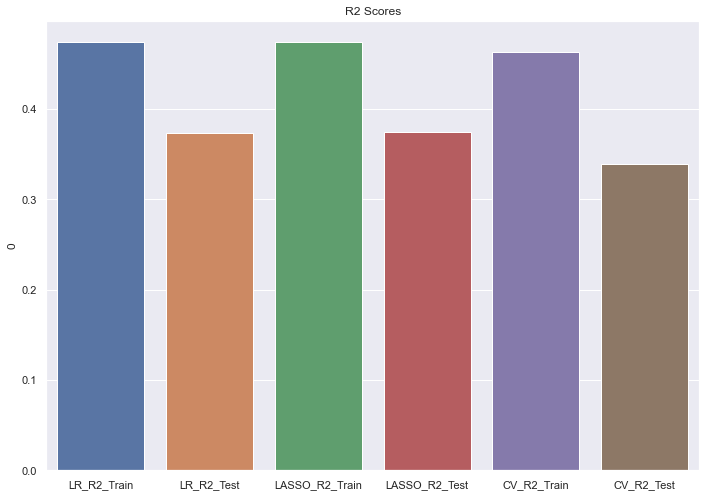

In [83]:
#Plot to compare models
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
score_comp = pd.DataFrame([{'LR_R2_Train':r2_score(y_train,model.predict(X_train)),
                            'LR_R2_Test':r2_score(y_test,model.predict(X_test)),
                            'LASSO_R2_Train':r2_score(y_train,lasso.predict(X_train)),
                            'LASSO_R2_Test':r2_score(y_test,lasso.predict(X_test)),
                            'CV_R2_Train':r2_score(y_train,cross_val_predict(lr,X_train,y_train,cv=5)),
                            'CV_R2_Test':r2_score(y_test,cross_val_predict(lr,X_test,y_test,cv=5))}]).transpose()

sns.barplot(x=score_comp.index,y=score_comp[0],data=score_comp).set(title='R2 Scores')

[Text(0.5, 1.0, 'MSE Scores')]

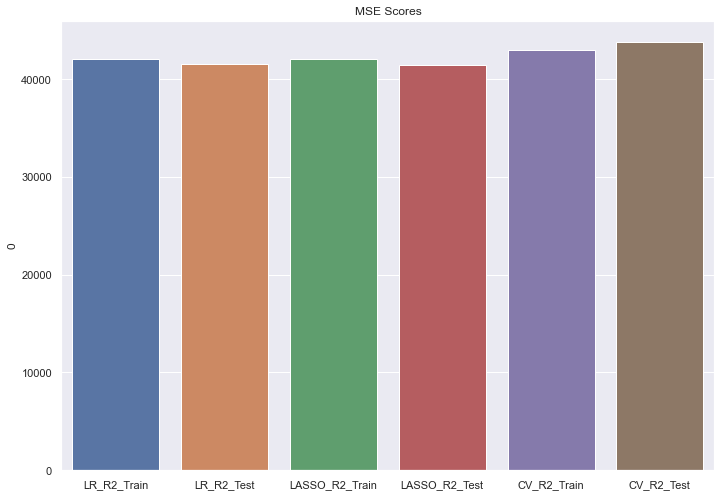

In [84]:
score_comp = pd.DataFrame([{'LR_R2_Train':mean_squared_error(y_train,model.predict(X_train)),
                            'LR_R2_Test':mean_squared_error(y_test,model.predict(X_test)),
                            'LASSO_R2_Train':mean_squared_error(y_train,lasso.predict(X_train)),
                            'LASSO_R2_Test':mean_squared_error(y_test,lasso.predict(X_test)),
                            'CV_R2_Train':mean_squared_error(y_train,cross_val_predict(lr,X_train,y_train,cv=5)),
                            'CV_R2_Test':mean_squared_error(y_test,cross_val_predict(lr,X_test,y_test,cv=5))}]).transpose()
sns.barplot(x=score_comp.index,y=score_comp[0],data=score_comp).set(title='MSE Scores')

LR Model Coefficients:  393.8521308044146 [-91.11165996 169.58408251  -7.27184053  -9.24905545  -1.53810918
   8.15029178]
According to this, the second feature which is Monthly.Premium.Auto is the most important feature with       coefficient of 169.58


[Text(0.5, 1.0, 'Feature Weights')]

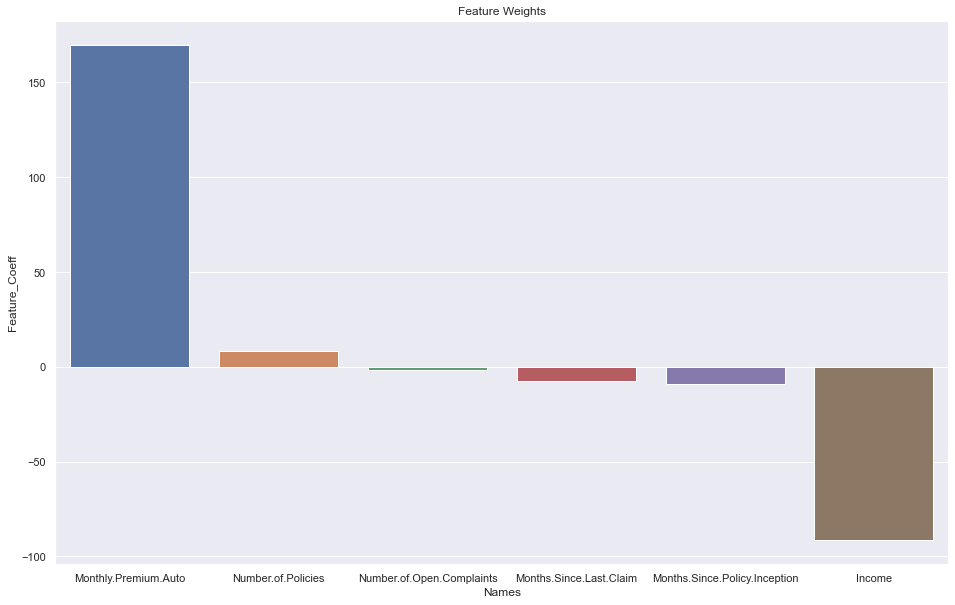

In [93]:
# Coefficients of Linear Regression are
# According to this, the second feature which is Monthly.Premium.Auto is the most important feature with coefficient of 169.58"
print("LR Model Coefficients: ", model.intercept_, model.coef_)
print("According to this, the second feature which is Monthly.Premium.Auto is the most important feature with \
      coefficient of 169.58")


sns.set(rc={'figure.figsize':(16,10)})
a = pd.DataFrame()
a['Names'] = x.columns
a['Feature_Coeff'] = model.coef_
a = a.sort_values('Feature_Coeff',ascending=False)
sns.barplot(x=a['Names'],y=a['Feature_Coeff'],data=a).set(title='Feature Weights')